In [1]:
%matplotlib inline

# Extract summary features

This example shows how to extract summary features from the tissue
image.

Summary features give a good overview over the intensity of each image
channels at the location of the Visium spots. They are calculated by
using `features = 'summary'`, which calls
`squidpy.im.ImageContainer.features_summary`.

In addition to `feature_name` and `channels` we can specify the
following `features_kwargs`:

> -   `quantiles` - quantiles that are computed. By default, the 0.9th,
>     0.5th, and 0.1th quantiles are calculated.

::: seealso
See `sphx_glr_auto_examples_image_compute_features.py` for general usage
of `squidpy.im.calculate_image_features`.
:::


In [2]:
import squidpy as sq

First, let\'s load the fluorescence Visium dataset.


In [3]:
# get spatial dataset including hires tissue image
img = sq.datasets.visium_fluo_image_crop()
adata = sq.datasets.visium_fluo_adata_crop()

In [4]:
img

ImageContainer[shape=(7272, 7272), layers=['image']]

In [5]:
adata

AnnData object with n_obs × n_vars = 704 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

Then, we calculate the 0.1th quantile, mean and standard deviation for
the Visium spots of the fluorescence channels 0 (DAPI) and 1 (GFAP). In
order to get statistics of only the tissue underneath the spots, we use
the argument `mask_circle = True`. When not setting this flag,
statistics are calculated using a square crop centered on the spot.


In [7]:
# calculate summary features and save in key "summary_features"
sq.im.calculate_image_features(
    adata,
    img,
    features="summary",
    features_kwargs={
        "summary": {
            "quantiles": [0.1],
            "channels": [0, 1],
        }
    },
    key_added="summary_features",
    mask_circle=True,
    show_progress_bar=False,
    n_jobs=8
)

The result is stored in `adata.obsm['summary_features']`.


In [8]:
adata.obsm["summary_features"].head()

,summary_ch-0_quantile-0.1,summary_ch-0_mean,summary_ch-0_std,summary_ch-1_quantile-0.1,summary_ch-1_mean,summary_ch-1_std
AAACGAGACGGTTGAT-1,0.0,6849.760120,14383.136990,0.0,3762.582691,2462.922155
AAAGGGATGTAGCAAG-1,0.0,4469.448519,11304.932832,0.0,3824.862145,2153.804234
AAATGGCATGTCTTGT-1,0.0,5944.567897,9808.327041,0.0,5481.824787,6747.728831
AAATGGTCAATGTGCC-1,0.0,5259.799257,9115.113451,0.0,2628.194501,1418.504292
AAATTAACGGGTAGCT-1,0.0,4468.428701,10285.605481,0.0,4036.154302,4447.304626


Use `squidpy.pl.extract` to plot the summary features on the tissue
image or have a look at [our interactive visualization
tutorial](../../external_tutorials/tutorial_napari.ipynb) to learn how
to use our interactive `napari` plugin. Note how the spatial
distribution of channel means is different for fluorescence channels 0
(DAPI stain) and 1 (GFAP stain).


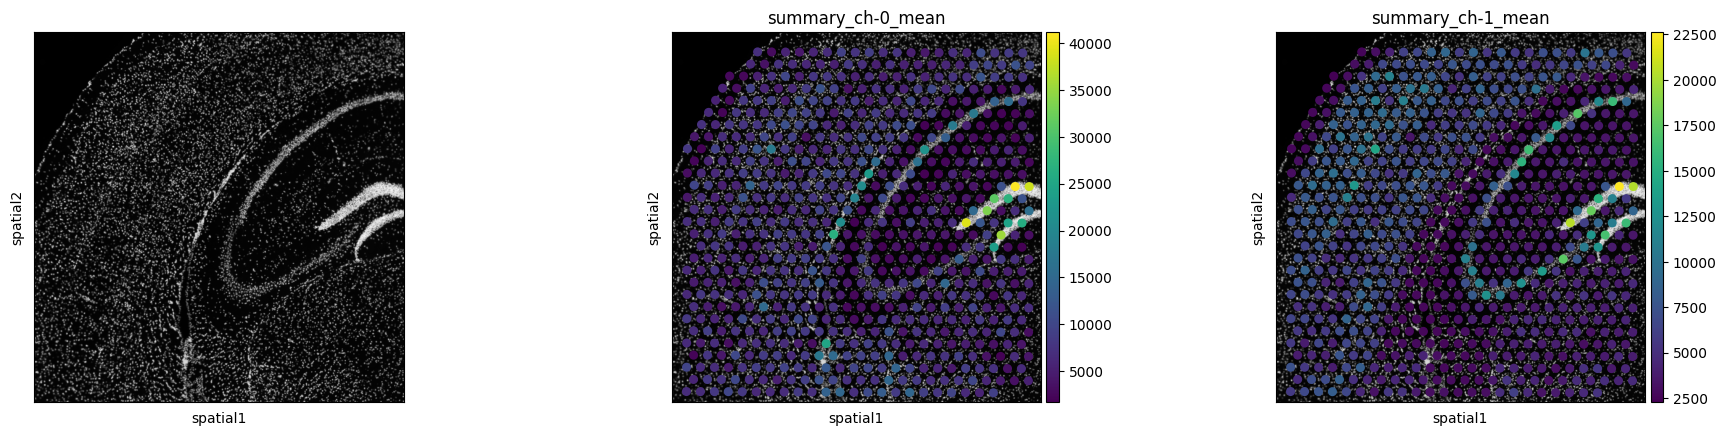

In [9]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, "summary_features"), color=[None, "summary_ch-0_mean", "summary_ch-1_mean"], img_cmap="gray"
)

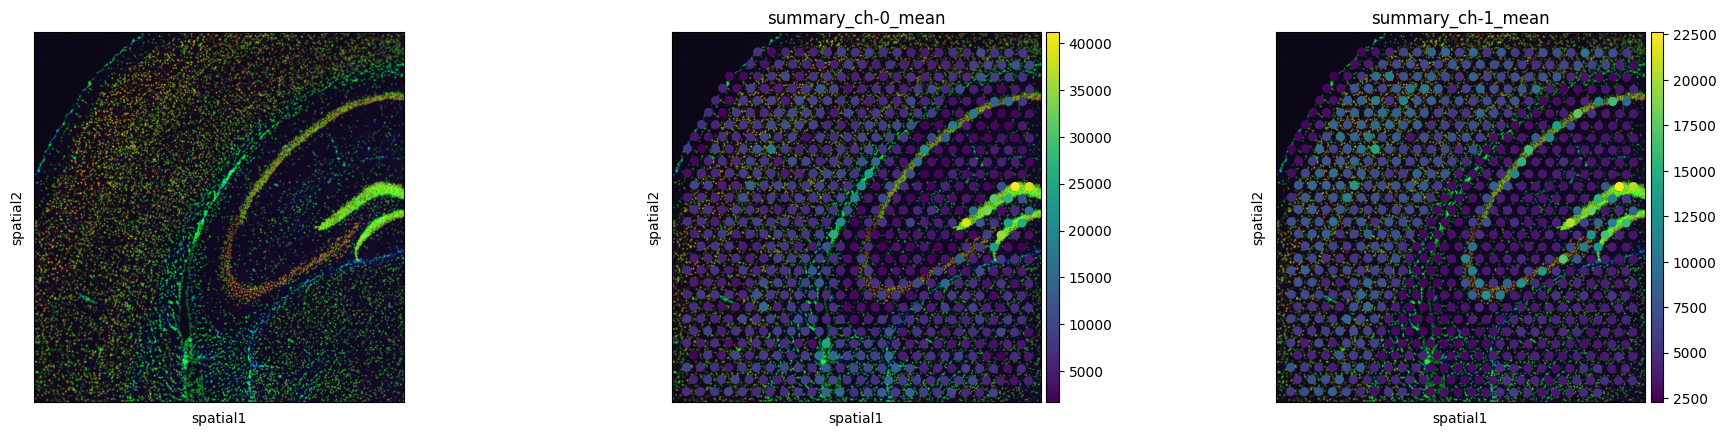

In [12]:
sq.pl.spatial_scatter(
    sq.pl.extract(adata, 'summary_features'),
    color=[None, "summary_ch-0_mean", "summary_ch-1_mean"]
)